# Loan Acceptance

### Introduction

##### In finance, a loan is the lending of money by one or more individuals, organizations, or other entities to other individuals, organizations, etc. The recipient (i.e. the borrower) incurs a debt, and is usually liable to pay interest on that debt until it is repaid, and also to repay the principal amount borrowed. To read more check out Wikipedia. The whole process of ascertaining if a burrower would pay back loans might be tedious hence the need to automate the procedure.

##### The aim of this project is to predict which of the customers will have their loan paid or not. Therefore, this is a supervised classification problem to be trained with different algorithms.

##### Project- Analysing Loan Acceptance using Python to make predictions

In [1]:
#Importing All the Libraries And Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Downloads/loan_acceptance.csv')

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Checking number of Rows & Columns

In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Checking missing values

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Summary of the Dataset

#### To find Mean, Standard Deviation & Quartile range


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Exploratory data analysis(EDA)

#### showing the null values as we can see credit_history and Self_employed column has the most number of Null Values

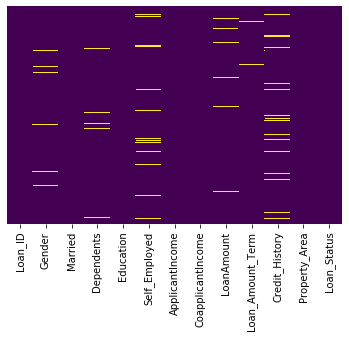

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
# fill the missing values for numerical terms - mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [9]:
# fill the missing values for categorical terms - mode
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

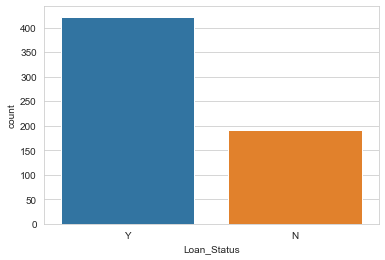

In [10]:
# showing the countplot  to how many person are eligible for Loan status
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',data=df)

In [11]:
#checking Again for the Null value
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

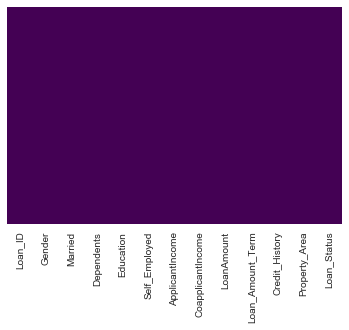

In [12]:
#No Null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Visualization

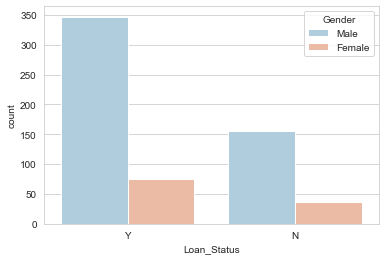

In [13]:
# Maximum person for eligible for Loan status are from Male Gender
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',hue='Gender',data=df,palette='RdBu_r')

#### Male is taking more loans than female

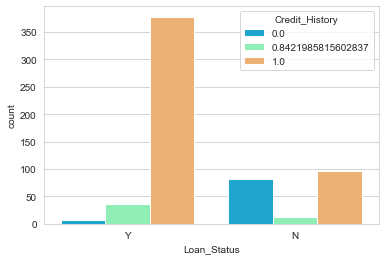

In [14]:
#showing The connection Between Loan Status and Credit History
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',hue='Credit_History',data=df,palette='rainbow')

#### The person whose credit score is high are more eligible for Loan than other having low credit score

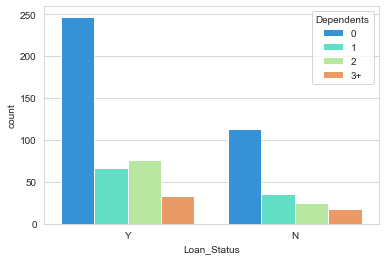

In [15]:
#showing The connection Between Loan Status and Dependents
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',hue='Dependents',data=df,palette='rainbow')

#### In this graph, those who have zero dependents are getting more loans than those who have dependents are getting less.

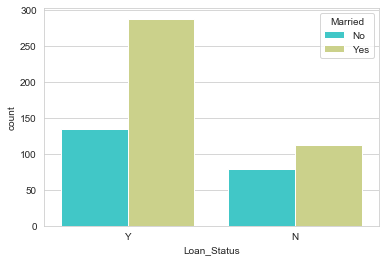

In [16]:
#showing The connection Between Loan Status and Maritual Status
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',hue='Married',data=df,palette='rainbow')

#### Married people have taken more loans than unmarried.

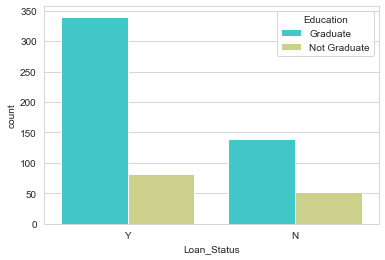

In [17]:
#showing The connection Between Loan Status and Education Status
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',hue='Education',data=df,palette='rainbow')

#### In this graph, Graduate people got more loans than not graduate

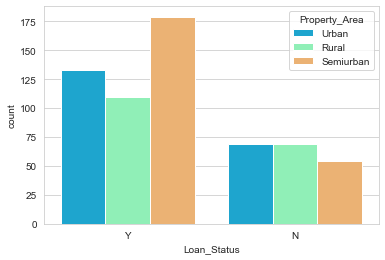

In [18]:
#showing The connection Between Loan Status and Property_Area
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',hue='Property_Area',data=df,palette='rainbow')

#### Semiurban has high loan compare to Urban & Rural

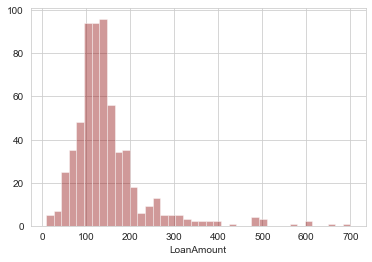

In [19]:
#showing In a displot(histogram) about the range of Loan Amount taking and Normal Distribution
sns.distplot(df['LoanAmount'].dropna(),kde=False,color='darkred',bins=40)

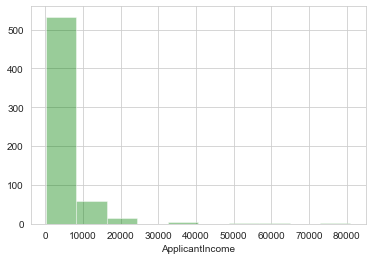

In [20]:
#showing In a displot(histogram) about the range of Applicant Income and Normal Distribution
sns.distplot(df['ApplicantIncome'].dropna(),kde=False,color='Green',bins=10)

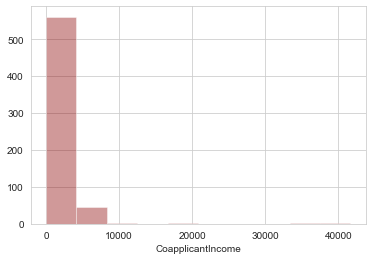

In [21]:
#showing In a displot(histogram) about the range of Co applicant Income and Normal Distribution
sns.distplot(df['CoapplicantIncome'].dropna(),kde=False,color='darkred',bins=10)

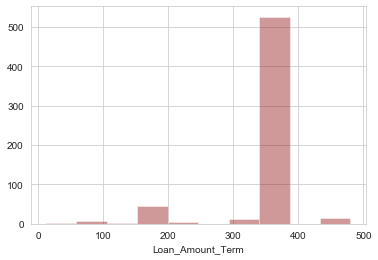

In [22]:
#showing In a displot(histogram) about the range of Loan_Amount_Term and Normal Distribution
sns.distplot(df['Loan_Amount_Term'].dropna(),kde=False,color='darkred',bins=10)

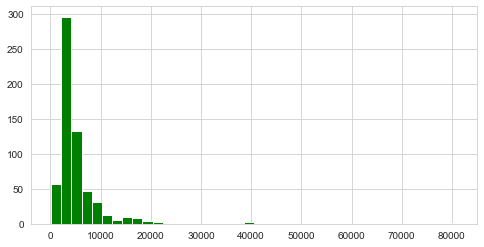

In [23]:
df['ApplicantIncome'].hist(color='green',bins=40,figsize=(8,4))

#### Box Plot

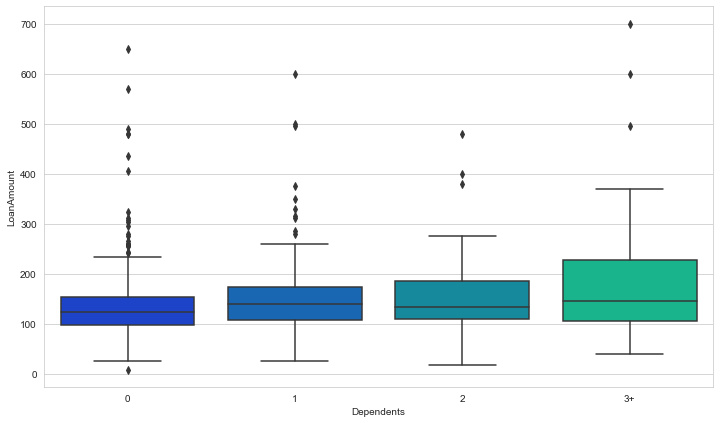

In [24]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Dependents',y='LoanAmount',data=df,palette='winter')

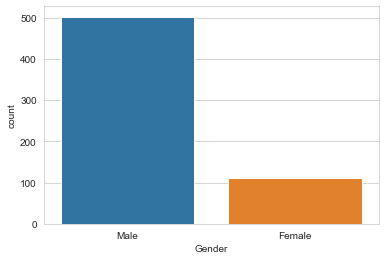

In [25]:
# categorical attributes visualization
sns.countplot(df['Gender'])


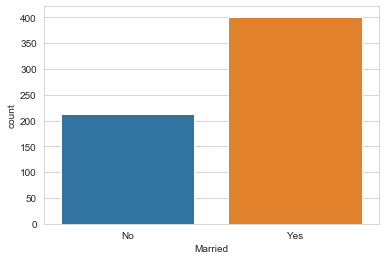

In [26]:
sns.countplot(df['Married'])

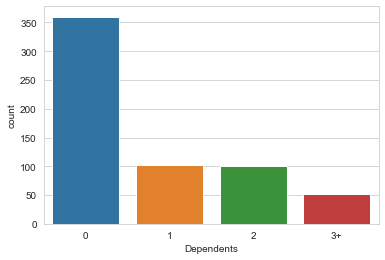

In [27]:
sns.countplot(df['Dependents'])

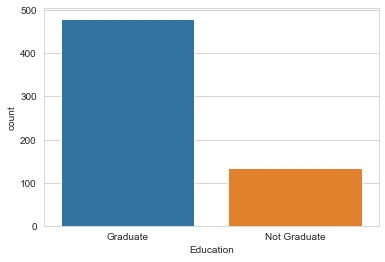

In [28]:
sns.countplot(df['Education'])

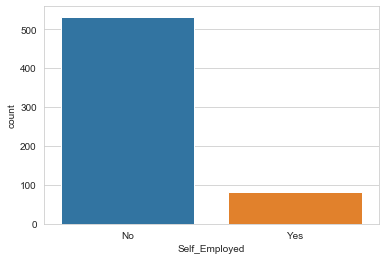

In [29]:
sns.countplot(df['Self_Employed'])

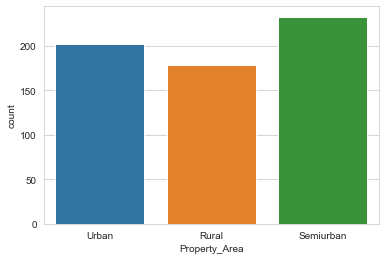

In [30]:
sns.countplot(df['Property_Area'])

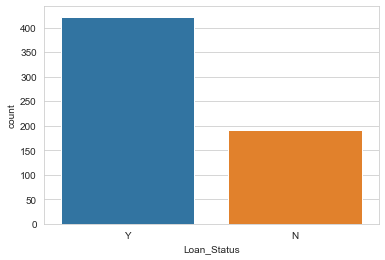

In [31]:
sns.countplot(df['Loan_Status'])

In [32]:
# total income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


#### Correlation Matrix

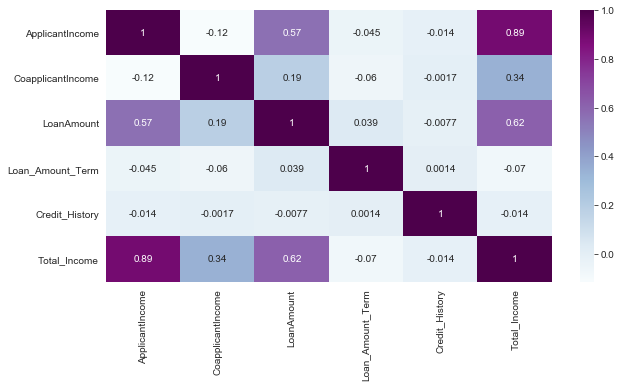

In [33]:
corr = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [34]:
# drop unnecessary columns
cols = ['Loan_ID']
df = df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


In [35]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,5849.0
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,6091.0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,3000.0
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4941.0
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,6000.0


#### Splitting the data into Train & Test

In [36]:
# specify input and output attributes
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [38]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

#### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 77.92207792207793
Cross validation is 80.45715047314408


In [40]:
y_predict = model.predict(x_test)

y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [41]:
from sklearn.metrics import classification_report


print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



#### Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 72.07792207792207
Cross validation is 72.80021324803411


#### Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 76.62337662337663
Cross validation is 78.3433293349327


#### Confusion Matrix

In [44]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[18, 25],
       [ 4, 76]], dtype=int64)

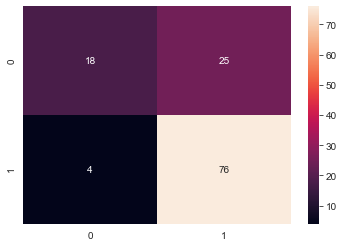

In [45]:
sns.heatmap(cm, annot=True)

#### KNN 

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train,y_train)

classify(model, X, y)

Accuracy is 74.67532467532467
Cross validation is 78.01679328268692


#### Conclusions

##### We have found that Logistic Regression machine learning algorithm has better accuracy than other algorithms over the test dataset. This model has a Accuracy of 0.77

In [51]:
import pickle

# save the model to the disk

filename = 'model_lr.pkl'

pickle.dump(model, open(filename,'wb'))

# load the model from disk

loaded_model = pickle.load(open(filename, 'rb'))

